In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set(style='white', palette='dark')
warnings.filterwarnings('ignore')
#%matplotlib inline

In [2]:
df = pd.read_csv("EconomiesOfScale.csv")

In [3]:
df

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013
...,...,...
995,8.099710,23.855067
996,8.739752,27.536542
997,8.780888,25.973787
998,8.897700,25.138311


In [4]:
df.isnull().sum()

Number of Units       0
Manufacturing Cost    0
dtype: int64

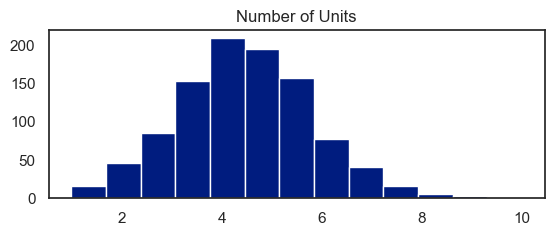

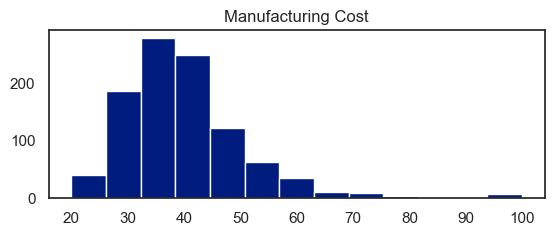

In [5]:
cnt = 1
for i in list(df.columns):
    plt.subplot(2,1,cnt)
    plt.hist(df[i], bins = 13)
    plt.title(i)
    plt.show()
    cnt += 1

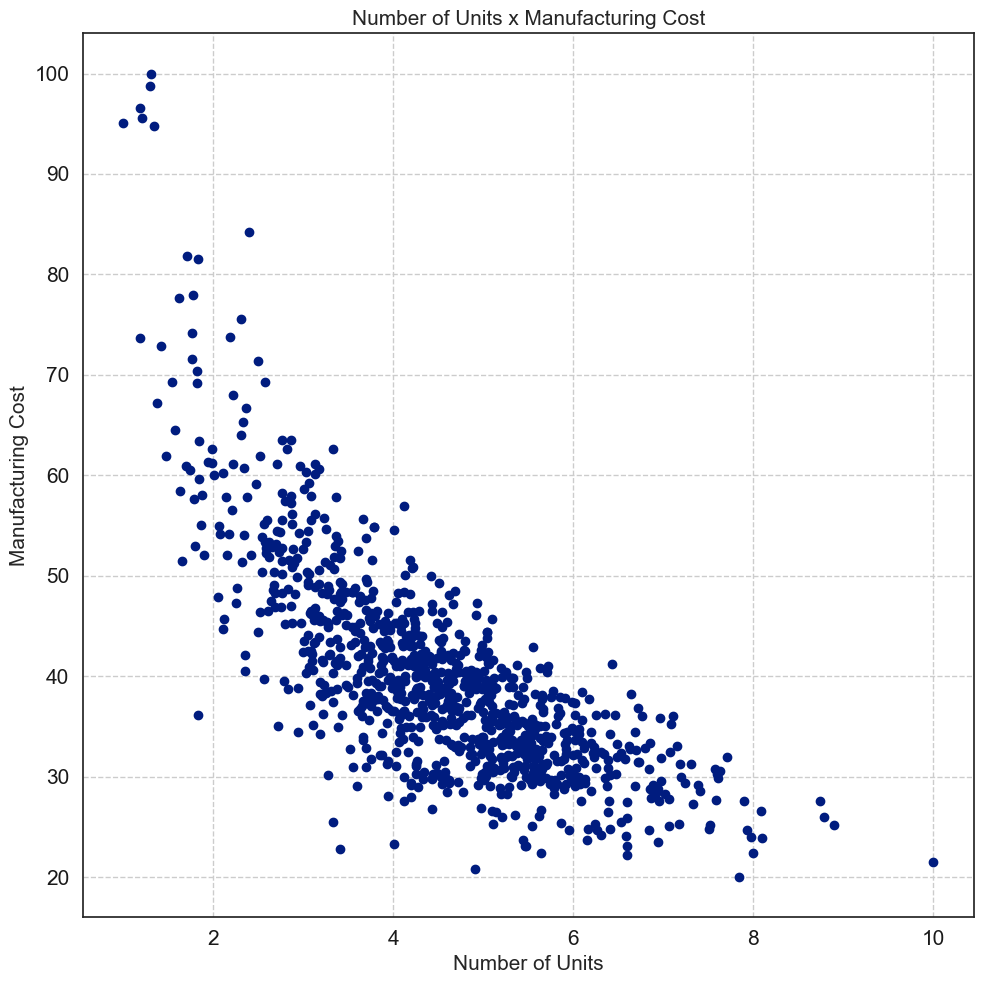

In [6]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.scatter(df['Number of Units'].values, df['Manufacturing Cost'].values,marker='o',
           color='b', alpha=1, linewidth=1)
ax.set_title('Number of Units x Manufacturing Cost', fontsize=15)
ax.set_xlabel(df.columns[0], fontsize=15)
ax.set_ylabel(df.columns[1], fontsize=15)
ax.grid(b=True, which='major', linestyle='--')
ax.tick_params(axis='both', labelsize=15, labelcolor='k')
plt.tight_layout()
#plt.savefig('manufacturing__cost.png')

In [7]:
X=df.drop('Manufacturing Cost', axis=1)
y=df['Manufacturing Cost']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((700, 1), (300, 1), (700,), (300,))

In [9]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = pd.DataFrame(sc_x.fit_transform(X_train), columns=X.columns.values)
X_test = pd.DataFrame(sc_x.transform(X_test), columns=X.columns.values)

Linear Model Coefficient (m):  [-8.11756865]
Linear Model Coefficient (b):  40.45886808021429


Text(0.5, 1.0, 'Economies Of Scale (Training dataset)')

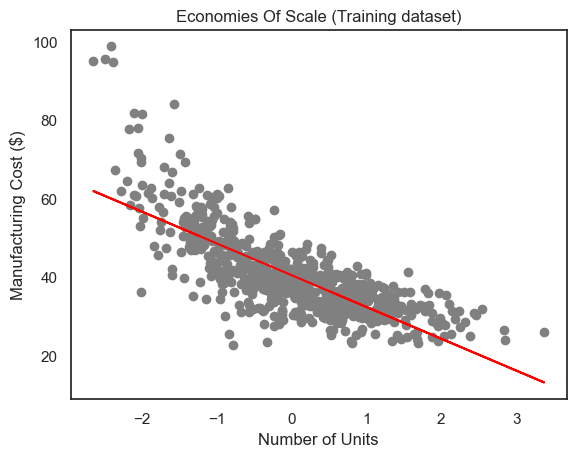

In [10]:
from sklearn.linear_model import LinearRegression
lr_regressor = LinearRegression(fit_intercept=True)
lr_regressor.fit(X_train, y_train)

print('Linear Model Coefficient (m): ', lr_regressor.coef_)
print('Linear Model Coefficient (b): ', lr_regressor.intercept_)

# Predicting Test Set
y_pred = lr_regressor.predict(X_test)

plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, lr_regressor.predict(X_train), color = 'red')
plt.ylabel('{} ($)'.format(df.columns[1]))
plt.xlabel('{}'.format(df.columns[0]))
plt.title('Economies Of Scale (Training dataset)')

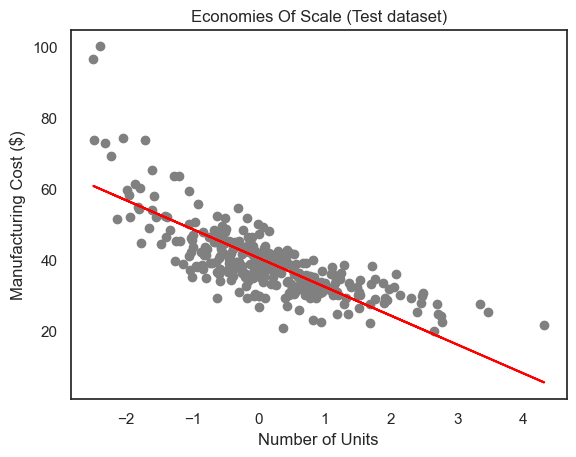

In [11]:
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, lr_regressor.predict(X_test), color = 'red')
plt.ylabel('{} ($)'.format(df.columns[1]))
plt.xlabel('{}'.format(df.columns[0]))
plt.title('Economies Of Scale (Test dataset)')

from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

results = pd.DataFrame([['Multiple Linear Regression', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

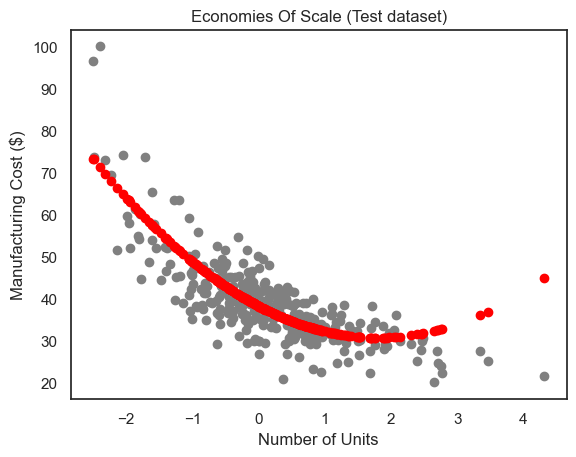

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
lr_poly_regressor = LinearRegression(fit_intercept=True)
lr_poly_regressor.fit(X_poly, y_train)

# Predicting Test Set
y_pred = lr_poly_regressor.predict(poly_reg.fit_transform(X_test))

plt.scatter(X_test, y_test, color = 'gray')
plt.scatter(X_test,y_pred, color = 'red')
plt.ylabel('{} ($)'.format(df.columns[1]))
plt.xlabel('{}'.format(df.columns[0]))
plt.title('Economies Of Scale (Test dataset)')

from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

model_results = pd.DataFrame([['Polynomial Regression', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

results = results.append(model_results, ignore_index = True)
plt.savefig('cost_fitting.png')

### SVM

In [13]:
'Necessary Standard Scaler '
from sklearn.svm import SVR
svr_regressor = SVR(kernel = 'rbf')
svr_regressor.fit(X_train, y_train)

# Predicting Test Set
y_pred = svr_regressor.predict(X_test)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

model_results = pd.DataFrame([['Support Vector RBF', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

results = results.append(model_results, ignore_index = True)

### Decision Tree Regression

In [14]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(X_train, y_train)

# Predicting Test Set
y_pred = dt_regressor.predict(X_test)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

model_results = pd.DataFrame([['Decision Tree Regression', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

results = results.append(model_results, ignore_index = True)

### Random Forest Regression

In [15]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=300, random_state=0)
rf_regressor.fit(X_train,y_train)

# Predicting Test Set
y_pred = rf_regressor.predict(X_test)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest Regression', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

results = results.append(model_results, ignore_index = True)

### Gradient Boosting

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)

# Predicting Test Set
y_pred = gb_regressor.predict(X_test)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

model_results = pd.DataFrame([['GradientBoosting Regressor', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

results = results.append(model_results, ignore_index = True)

In [17]:
##Ensemble Voting regressor
from sklearn.ensemble import VotingRegressor
voting_regressor = VotingRegressor(estimators= [('lr', lr_regressor),
                                                  ('lr_poly', lr_poly_regressor),
                                                  ('svr', svr_regressor),
                                                  ('dt', dt_regressor),
                                                  ('rf', rf_regressor),
                                                  ('gb', gb_regressor),
                                               ])

for clf in (lr_regressor,lr_poly_regressor,svr_regressor,dt_regressor,
            rf_regressor, gb_regressor, voting_regressor):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, metrics.r2_score(y_test, y_pred))

# Predicting Test Set
y_pred = voting_regressor.predict(X_test)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

model_results = pd.DataFrame([['Ensemble Voting', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

results = results.append(model_results, ignore_index = True)  

LinearRegression 0.5666859743286023
LinearRegression 0.5666859743286023
SVR 0.5837660362451134
DecisionTreeRegressor 0.4325769401033296
RandomForestRegressor 0.587800117180366
GradientBoostingRegressor 0.68342729730414
VotingRegressor 0.6771649566240752


In [18]:
print('The best regressor is:')
print('{}'.format(results.sort_values(by='R2 Score',ascending=False).head(5)))

The best regressor is:
                        Model       MAE        MSE      RMSE  R2 Score
5  GradientBoosting Regressor  4.371554  34.099692  5.839494  0.683427
6             Ensemble Voting  4.470920  34.774241  5.896969  0.677165
1       Polynomial Regression  4.621537  37.737629  6.143096  0.649654
4    Random Forest Regression  4.997325  44.400193  6.663347  0.587800
2          Support Vector RBF  4.701673  44.834725  6.695874  0.583766


In [19]:
from sklearn.model_selection import cross_val_score
def display_scores (scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard:', scores.std())

lin_scores = cross_val_score(estimator=voting_regressor, X=X_train, y=y_train, 
                             scoring= 'neg_mean_squared_error',cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [6.60159115 5.66414321 7.33844615 7.60103148 6.64742816 6.00029574
 7.50580482 7.13892333 6.02789108 4.97217917]
Mean: 6.5497734295268675
Standard: 0.8275200757733129


In [20]:
y_test

993    22.349817
859    36.344797
298    44.813535
553    40.332289
672    38.520193
         ...    
167    50.610101
998    25.138311
984    27.709089
491    49.992882
10     69.284097
Name: Manufacturing Cost, Length: 300, dtype: float64

In [21]:
X

,Number of Units
0,1.000000
1,1.185994
2,1.191499
3,1.204771
4,1.298773
...,...
995,8.099710
996,8.739752
997,8.780888
998,8.897700


In [22]:
min(X_test['Number of Units']), max(X_test['Number of Units'])

(-2.4985211147188573, 4.315489602440782)

In [23]:
x7k = pd.DataFrame([7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0])
X7k = pd.DataFrame(sc_x.transform(x7k))

In [24]:
pred7k_gbr = gb_regressor.predict(X7k)
pred7k_vr = voting_regressor.predict(X7k)

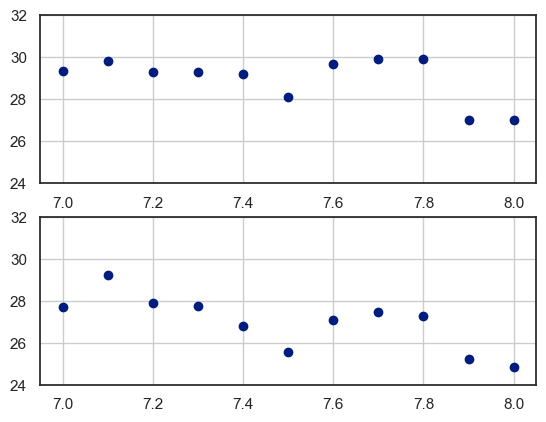

In [25]:

plt.subplot(2,1,1)
#plt.gca().axes.xaxis.set_visible(False)
plt.scatter(x7k, pred7k_gbr)
plt.ylim(24, 32)
plt.grid()


plt.subplot(2,1,2)
plt.scatter(x7k, pred7k_vr)
plt.ylim(24, 32)
plt.grid()

plt.show()
#plt.savefig('predict.png')

In [29]:
sc_x.transform(pd.DataFrame([0,1, 2, 3,4,5,6,7,8,9,10]))

array([[-3.41539967],
       [-2.64231075],
       [-1.86922182],
       [-1.09613289],
       [-0.32304396],
       [ 0.45004496],
       [ 1.22313389],
       [ 1.99622282],
       [ 2.76931175],
       [ 3.54240067],
       [ 4.3154896 ]])